#### Analisis Prediksi SVR Saham BRI

##### Import Library

In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

##### Load Dataset

In [2]:
df = pd.read_csv("Data Historis BBRI Jan 2018 - Des 2023.csv")
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,29/12/2023,5.725,5.75,5.750,5.675,"93,13M","0,00%"
1,28/12/2023,5.725,5.70,5.750,5.675,"121,43M","1,78%"
2,27/12/2023,5.625,5.70,5.725,5.625,"131,37M","-0,88%"
3,22/12/2023,5.675,5.65,5.700,5.600,"109,41M","1,79%"
4,21/12/2023,5.575,5.55,5.600,5.525,"99,05M","0,45%"
...,...,...,...,...,...,...,...
1454,08/01/2018,3.590,3.59,3.590,3.560,"54,56M","0,00%"
1455,05/01/2018,3.590,3.55,3.590,3.520,"87,10M","1,13%"
1456,04/01/2018,3.550,3.61,3.610,3.460,"156,41M","-1,66%"
1457,03/01/2018,3.610,3.63,3.630,3.560,"70,15M","-0,55%"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     1459 non-null   object 
 1   Terakhir    1459 non-null   float64
 2   Pembukaan   1459 non-null   float64
 3   Tertinggi   1459 non-null   float64
 4   Terendah    1459 non-null   float64
 5   Vol.        1459 non-null   object 
 6   Perubahan%  1459 non-null   object 
dtypes: float64(4), object(3)
memory usage: 79.9+ KB


##### Merubah Tipe Data ( Datetime )

In [4]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

C:\Users\Vivo Design\AppData\Local\Temp\ipykernel_5632\3225071182.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df['Tanggal'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     1459 non-null   datetime64[ns]
 1   Terakhir    1459 non-null   float64       
 2   Pembukaan   1459 non-null   float64       
 3   Tertinggi   1459 non-null   float64       
 4   Terendah    1459 non-null   float64       
 5   Vol.        1459 non-null   object        
 6   Perubahan%  1459 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 79.9+ KB


In [6]:
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2023-12-29,5.725,5.75,5.750,5.675,"93,13M","0,00%"
1,2023-12-28,5.725,5.70,5.750,5.675,"121,43M","1,78%"
2,2023-12-27,5.625,5.70,5.725,5.625,"131,37M","-0,88%"
3,2023-12-22,5.675,5.65,5.700,5.600,"109,41M","1,79%"
4,2023-12-21,5.575,5.55,5.600,5.525,"99,05M","0,45%"
...,...,...,...,...,...,...,...
1454,2018-08-01,3.590,3.59,3.590,3.560,"54,56M","0,00%"
1455,2018-05-01,3.590,3.55,3.590,3.520,"87,10M","1,13%"
1456,2018-04-01,3.550,3.61,3.610,3.460,"156,41M","-1,66%"
1457,2018-03-01,3.610,3.63,3.630,3.560,"70,15M","-0,55%"


##### Merubah Isi Pada Kolom Perubahan %

In [7]:
df['Perubahan%'] = df['Perubahan%'].str.replace('%','')
df['Perubahan%'] = df['Perubahan%'].str.replace(',','.')
df['Vol.'] = df['Vol.'].str.replace('M','')
df['Vol.'] = df['Vol.'].str.replace('B','')
df['Vol.'] = df['Vol.'].str.replace(',','.')
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2023-12-29,5.725,5.75,5.750,5.675,93.13,0.00
1,2023-12-28,5.725,5.70,5.750,5.675,121.43,1.78
2,2023-12-27,5.625,5.70,5.725,5.625,131.37,-0.88
3,2023-12-22,5.675,5.65,5.700,5.600,109.41,1.79
4,2023-12-21,5.575,5.55,5.600,5.525,99.05,0.45
...,...,...,...,...,...,...,...
1454,2018-08-01,3.590,3.59,3.590,3.560,54.56,0.00
1455,2018-05-01,3.590,3.55,3.590,3.520,87.10,1.13
1456,2018-04-01,3.550,3.61,3.610,3.460,156.41,-1.66
1457,2018-03-01,3.610,3.63,3.630,3.560,70.15,-0.55


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     1459 non-null   datetime64[ns]
 1   Terakhir    1459 non-null   float64       
 2   Pembukaan   1459 non-null   float64       
 3   Tertinggi   1459 non-null   float64       
 4   Terendah    1459 non-null   float64       
 5   Vol.        1459 non-null   object        
 6   Perubahan%  1459 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 79.9+ KB


##### Merubah Tipe Data Kolom Vol & Perubahan Menjadi Float

In [9]:
df['Vol.'] = df['Vol.'].astype('float64')
df['Perubahan%'] = df['Perubahan%'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     1459 non-null   datetime64[ns]
 1   Terakhir    1459 non-null   float64       
 2   Pembukaan   1459 non-null   float64       
 3   Tertinggi   1459 non-null   float64       
 4   Terendah    1459 non-null   float64       
 5   Vol.        1459 non-null   float64       
 6   Perubahan%  1459 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.9 KB


In [10]:
df.isna().sum()

Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64

C:\Users\Vivo Design\AppData\Local\Temp\ipykernel_5632\669549753.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pembukaan'],hist=True)


<AxesSubplot: xlabel='Pembukaan', ylabel='Density'>

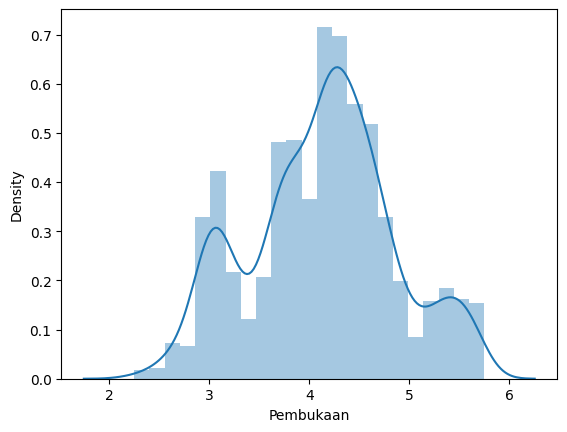

In [11]:
import seaborn as sns

sns.distplot(df['Pembukaan'],hist=True)

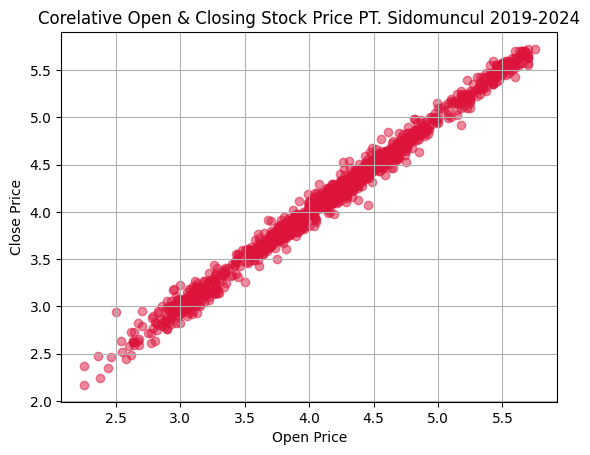

In [12]:
plt.scatter(x=df['Pembukaan'],y=df['Terakhir'], c='crimson',alpha=0.5)
plt.title('Corelative Open & Closing Stock Price PT. Sidomuncul 2019-2024')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)

plt.show()

In [13]:
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2023-12-29,5.725,5.75,5.750,5.675,93.13,0.00
1,2023-12-28,5.725,5.70,5.750,5.675,121.43,1.78
2,2023-12-27,5.625,5.70,5.725,5.625,131.37,-0.88
3,2023-12-22,5.675,5.65,5.700,5.600,109.41,1.79
4,2023-12-21,5.575,5.55,5.600,5.525,99.05,0.45
...,...,...,...,...,...,...,...
1454,2018-08-01,3.590,3.59,3.590,3.560,54.56,0.00
1455,2018-05-01,3.590,3.55,3.590,3.520,87.10,1.13
1456,2018-04-01,3.550,3.61,3.610,3.460,156.41,-1.66
1457,2018-03-01,3.610,3.63,3.630,3.560,70.15,-0.55


#### Cek Duplikasi

In [14]:
df.duplicated().sum()

0

In [15]:
df['Deviasi'] = df['Terakhir'] - df['Pembukaan']

df['Deviasi']

0      -0.025
1       0.025
2      -0.075
3       0.025
4       0.025
        ...  
1454    0.000
1455    0.040
1456   -0.060
1457   -0.020
1458   -0.060
Name: Deviasi, Length: 1459, dtype: float64

In [16]:
df.corr().style.set_precision(3)

C:\Users\Vivo Design\AppData\Local\Temp\ipykernel_5632\4179951600.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.set_precision(3)


C:\Users\Vivo Design\AppData\Local\Temp\ipykernel_5632\4179951600.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.set_precision(3)


,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Deviasi
Terakhir,1.000,0.995,0.998,0.998,-0.216,0.055,0.072
Pembukaan,0.995,1.000,0.998,0.998,-0.224,-0.025,-0.025
Tertinggi,0.998,0.998,1.000,0.997,-0.196,0.017,0.026
Terendah,0.998,0.998,0.997,1.000,-0.239,0.012,0.024
Vol.,-0.216,-0.224,-0.196,-0.239,1.000,0.097,0.076
Perubahan%,0.055,-0.025,0.017,0.012,0.097,1.000,0.827
Deviasi,0.072,-0.025,0.026,0.024,0.076,0.827,1.000


In [17]:
jumlah_deviasi_negatif = df[df['Deviasi']<0].count()
jumlah_deviasi_negatif

Tanggal       714
Terakhir      714
Pembukaan     714
Tertinggi     714
Terendah      714
Vol.          714
Perubahan%    714
Deviasi       714
dtype: int64

In [18]:
jumlah_deviasi_positif = df[df['Deviasi']>0].count()
jumlah_deviasi_positif

Tanggal       618
Terakhir      618
Pembukaan     618
Tertinggi     618
Terendah      618
Vol.          618
Perubahan%    618
Deviasi       618
dtype: int64

##### Feature Engineering

In [19]:
df['Hari'] = df['Tanggal'].dt.day
df['Bulan'] = df['Tanggal'].dt.month
df['Tahun'] = df['Tanggal'].dt.year

In [20]:
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Deviasi,Hari,Bulan,Tahun
0,2023-12-29,5.725,5.75,5.750,5.675,93.13,0.00,-0.025,29,12,2023
1,2023-12-28,5.725,5.70,5.750,5.675,121.43,1.78,0.025,28,12,2023
2,2023-12-27,5.625,5.70,5.725,5.625,131.37,-0.88,-0.075,27,12,2023
3,2023-12-22,5.675,5.65,5.700,5.600,109.41,1.79,0.025,22,12,2023
4,2023-12-21,5.575,5.55,5.600,5.525,99.05,0.45,0.025,21,12,2023
...,...,...,...,...,...,...,...,...,...,...,...
1454,2018-08-01,3.590,3.59,3.590,3.560,54.56,0.00,0.000,1,8,2018
1455,2018-05-01,3.590,3.55,3.590,3.520,87.10,1.13,0.040,1,5,2018
1456,2018-04-01,3.550,3.61,3.610,3.460,156.41,-1.66,-0.060,1,4,2018
1457,2018-03-01,3.610,3.63,3.630,3.560,70.15,-0.55,-0.020,1,3,2018


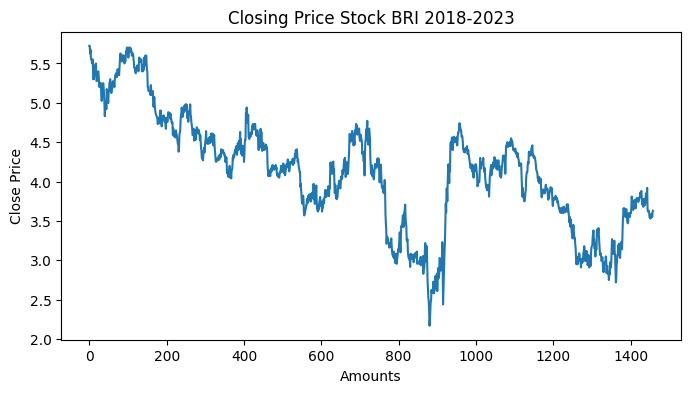

In [21]:
plt.figure(figsize=(8,4))
plt.plot(df['Terakhir'])
plt.xlabel('Amounts')
plt.ylabel('Close Price')
plt.title('Closing Price Stock BRI 2018-2023')
plt.show()

##### Visualisasi Deviasi

Text(0.5, 1.0, 'Deviation Chart Price Stock BRI Period Jan 2018 - Dec 2023')

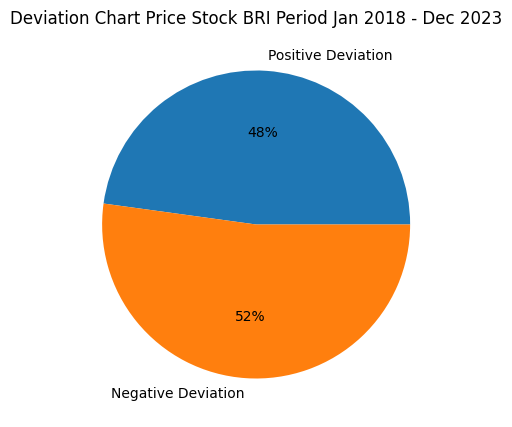

In [22]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
nama_deviasi = ["Positive Deviation","Negative Deviation"]
jumlah = [11,12]

ax.pie(jumlah,labels=nama_deviasi,autopct='%1.0f%%')
ax.set_title('Deviation Chart Price Stock BRI Period Jan 2018 - Dec 2023')

##### Korelasi

C:\Users\Vivo Design\AppData\Local\Temp\ipykernel_5632\1591443880.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True)


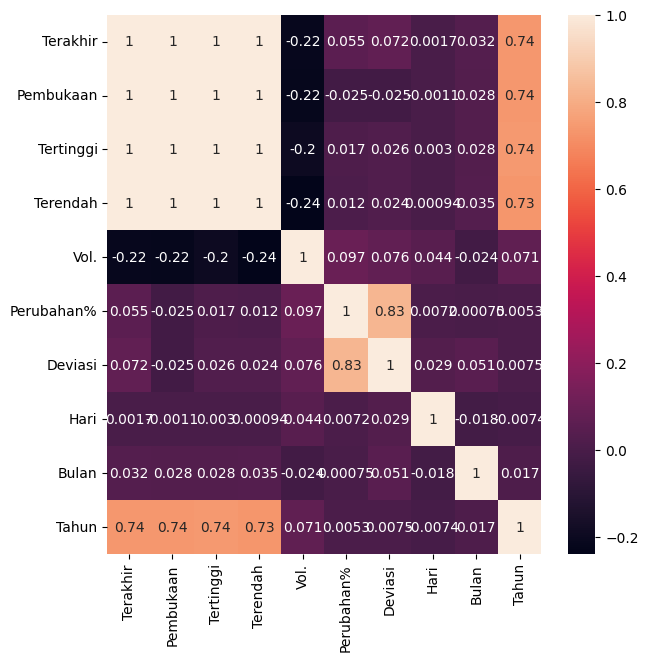

In [23]:
import seaborn as sns 

plt.figure(figsize=(7,7))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [24]:
df.corr()['Terakhir']

C:\Users\Vivo Design\AppData\Local\Temp\ipykernel_5632\1626921247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Terakhir']


Terakhir      1.000000
Pembukaan     0.995323
Tertinggi     0.997831
Terendah      0.997956
Vol.         -0.216109
Perubahan%    0.055151
Deviasi       0.072013
Hari          0.001711
Bulan         0.032411
Tahun         0.735276
Name: Terakhir, dtype: float64

In [25]:
df.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Deviasi,Hari,Bulan,Tahun
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,4.121035,4.125487,4.169469,4.074988,147.305387,0.052454,-0.004452,15.735435,6.555175,2020.501028
std,0.722447,0.720790,0.718761,0.723558,87.738843,2.084472,0.069814,8.732179,3.431908,1.701437
min,2.170000,2.250000,2.270000,2.160000,27.680000,-7.810000,-0.381000,1.000000,1.000000,2018.000000
25%,3.664000,3.680000,3.718500,3.629500,91.580000,-0.975000,-0.049000,8.000000,4.000000,2019.000000
50%,4.180000,4.180000,4.220000,4.130000,123.840000,0.000000,0.000000,16.000000,7.000000,2021.000000
75%,4.560000,4.570000,4.610000,4.520000,173.800000,1.035000,0.039000,23.000000,10.000000,2022.000000
max,5.725000,5.750000,5.750000,5.675000,872.610000,20.490000,0.440000,31.000000,12.000000,2023.000000


##### Uji Normalitas Dengan Plot

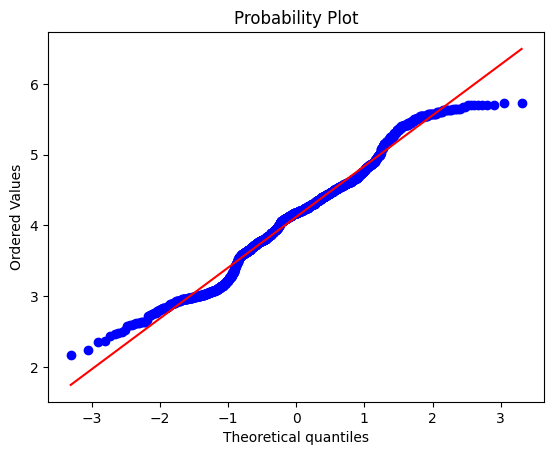

In [26]:
import pylab
import scipy.stats as stats

stats.probplot(df['Terakhir'], dist="norm", plot=pylab)
pylab.show()

##### T-Test ( Uji Signifikan )

In [27]:
t_test = stats.ttest_rel(df['Pembukaan'],df['Terakhir'])

if t_test.pvalue < 0.05 :
    print('Significance Level Alpha < 0.05')
    print('Tidak Ada perbedaan signifikan')
else:
    print('Significance Level Alpha > 0.05')
    print('Ada perbedaan signifikan')

t_test

Significance Level Alpha < 0.05
Tidak Ada perbedaan signifikan


TtestResult(statistic=2.435600974869367, pvalue=0.014986217002637043, df=1458)

#### Uji Signifikan

In [28]:
from scipy.stats import ttest_ind

print('Nilai p Acuan = 0,05')
print(ttest_ind(df['Pembukaan'],df['Terakhir']))


Nilai p Acuan = 0,05
Ttest_indResult(statistic=0.16662054617462496, pvalue=0.8676801784270942)


##### Pembuatan Model SVM

##### Splitting Dataset

In [29]:
df['Perubahan%'] = df['Perubahan%'].astype('float')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     1459 non-null   datetime64[ns]
 1   Terakhir    1459 non-null   float64       
 2   Pembukaan   1459 non-null   float64       
 3   Tertinggi   1459 non-null   float64       
 4   Terendah    1459 non-null   float64       
 5   Vol.        1459 non-null   float64       
 6   Perubahan%  1459 non-null   float64       
 7   Deviasi     1459 non-null   float64       
 8   Hari        1459 non-null   int64         
 9   Bulan       1459 non-null   int64         
 10  Tahun       1459 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 125.5 KB


In [31]:
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Deviasi,Hari,Bulan,Tahun
0,2023-12-29,5.725,5.75,5.750,5.675,93.13,0.00,-0.025,29,12,2023
1,2023-12-28,5.725,5.70,5.750,5.675,121.43,1.78,0.025,28,12,2023
2,2023-12-27,5.625,5.70,5.725,5.625,131.37,-0.88,-0.075,27,12,2023
3,2023-12-22,5.675,5.65,5.700,5.600,109.41,1.79,0.025,22,12,2023
4,2023-12-21,5.575,5.55,5.600,5.525,99.05,0.45,0.025,21,12,2023
...,...,...,...,...,...,...,...,...,...,...,...
1454,2018-08-01,3.590,3.59,3.590,3.560,54.56,0.00,0.000,1,8,2018
1455,2018-05-01,3.590,3.55,3.590,3.520,87.10,1.13,0.040,1,5,2018
1456,2018-04-01,3.550,3.61,3.610,3.460,156.41,-1.66,-0.060,1,4,2018
1457,2018-03-01,3.610,3.63,3.630,3.560,70.15,-0.55,-0.020,1,3,2018


In [32]:
X = df.values[:,2:5]

print('Data Independen/X\n',X)

Data Independen/X
 [[5.75 5.75 5.675]
 [5.7 5.75 5.675]
 [5.7 5.725 5.625]
 ...
 [3.61 3.61 3.46]
 [3.63 3.63 3.56]
 [3.69 3.72 3.61]]


In [33]:
Y = df.values[:,1]

print('Data Dependen/Y\n',Y)

Data Dependen/Y
 [5.725 5.725 5.625 ... 3.55 3.61 3.63]


In [34]:
X = np.array(X)
X

array([[5.75, 5.75, 5.675],
       [5.7, 5.75, 5.675],
       [5.7, 5.725, 5.625],
       ...,
       [3.61, 3.61, 3.46],
       [3.63, 3.63, 3.56],
       [3.69, 3.72, 3.61]], dtype=object)

In [35]:
Y = np.array(Y)
Y

array([5.725, 5.725, 5.625, ..., 3.55, 3.61, 3.63], dtype=object)

In [36]:
Y = Y.reshape(-1,1)

Y

array([[5.725],
       [5.725],
       [5.625],
       ...,
       [3.55],
       [3.61],
       [3.63]], dtype=object)

#### Normalisasi Data

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaled_data = MinMaxScaler()
scaled_X = scaled_data.fit_transform(X)
scaled_Y = scaled_data.fit_transform(Y)

#### Pemodelan SVR

In [85]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,scaled_Y,random_state=40,test_size=0.15)

model = SVR(kernel='rbf', C=0.1, epsilon=0.001,gamma=1)

model.fit(x_train,y_train)

c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, epsilon=0.001, gamma=1)

#### Optimasi Grid Search CV

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01,0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

search = GridSearchCV(estimator=SVR(),param_grid=param_grid,refit=True, verbose=2)

search.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, k

c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.001, kernel=poly; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END ................C=0.01, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.01, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.01, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.01, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.01, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................

c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.2s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.2s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.2s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.2s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END ........................C=100, gamma=1, kernel=poly; total time=   2.6s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=100, gamma=1, kernel=poly; total time=   3.4s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=100, gamma=1, kernel=poly; total time=   4.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=100, gamma=1, kernel=poly; total time=   3.6s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=100, gamma=1, kernel=poly; total time=   3.4s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s


c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\v

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [87]:
print(search.best_estimator_)

SVR(C=0.1, gamma=1)


In [88]:
print(search.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [89]:
prediksi = model.predict(x_test)

prediksi

array([0.79865797, 0.53377568, 0.42669613, 0.46561695, 0.84942637,
       0.67587282, 0.18325209, 0.293569  , 0.9459499 , 0.48326023,
       0.4517347 , 0.61904617, 0.58248577, 0.14368639, 0.62590091,
       0.48178429, 0.63424357, 0.96238422, 0.48933746, 0.3413095 ,
       0.60783622, 0.626967  , 0.52748639, 0.72868739, 0.49473558,
       0.69297299, 0.69169803, 0.20993734, 0.5006963 , 0.9756661 ,
       0.56677523, 0.43559683, 0.77417455, 0.6878765 , 0.39428787,
       0.73605464, 0.41963577, 0.95679056, 0.4484004 , 0.3225087 ,
       0.56644518, 0.61120892, 0.24300217, 0.55869854, 0.53479795,
       0.45804835, 0.40822964, 0.34009119, 0.5697912 , 0.16328416,
       0.82050925, 0.55930671, 0.81294359, 0.64552819, 0.66120677,
       0.5532907 , 0.12713677, 0.60894107, 0.56616813, 0.67342783,
       0.53307894, 0.68610927, 0.63140465, 0.94894351, 0.65102102,
       0.57560379, 0.38496776, 0.22851446, 0.72232691, 0.48584947,
       0.18667881, 0.66882128, 0.46205372, 0.46504971, 0.13533

In [90]:
prediksi = prediksi.reshape(-1,1)

#### Denormalisasi Nilai Prediksi

In [91]:
inversed_scaled_Y_test = scaled_data.inverse_transform(y_test)

inversed_scaled_Y_test

array([[5.   ],
       [4.08 ],
       [3.66 ],
       [3.79 ],
       [5.15 ],
       [4.52 ],
       [2.78 ],
       [3.27 ],
       [5.5  ],
       [3.89 ],
       [3.776],
       [4.351],
       [4.283],
       [2.62 ],
       [4.4  ],
       [3.87 ],
       [4.41 ],
       [5.6  ],
       [3.93 ],
       [3.41 ],
       [4.35 ],
       [4.38 ],
       [4.07 ],
       [4.75 ],
       [3.89 ],
       [4.65 ],
       [4.595],
       [2.898],
       [3.91 ],
       [5.7  ],
       [4.18 ],
       [3.688],
       [4.94 ],
       [4.61 ],
       [3.5  ],
       [4.76 ],
       [3.63 ],
       [5.625],
       [3.79 ],
       [3.28 ],
       [4.195],
       [4.36 ],
       [3.083],
       [4.11 ],
       [4.07 ],
       [3.8  ],
       [3.62 ],
       [3.23 ],
       [4.23 ],
       [2.79 ],
       [5.15 ],
       [4.176],
       [5.075],
       [4.49 ],
       [4.59 ],
       [4.13 ],
       [2.58 ],
       [4.31 ],
       [4.16 ],
       [4.54 ],
       [4.1  ],
       [4.595],
       [

In [92]:
inversed_scaled_prediksi = scaled_data.inverse_transform(prediksi)

inversed_scaled_prediksi

array([[5.00922908],
       [4.06757254],
       [3.68690475],
       [3.82526827],
       [5.18971073],
       [4.57272786],
       [2.82146118],
       [3.21363778],
       [5.53285189],
       [3.88799011],
       [3.77591687],
       [4.37070913],
       [4.24073691],
       [2.68080511],
       [4.39507774],
       [3.88274314],
       [4.42473589],
       [5.59127591],
       [3.90959466],
       [3.38335529],
       [4.33085776],
       [4.39886767],
       [4.04521413],
       [4.76048368],
       [3.92878497],
       [4.63351899],
       [4.62898649],
       [2.91632724],
       [3.94997535],
       [5.63849299],
       [4.18488594],
       [3.71854671],
       [4.92219051],
       [4.61540095],
       [3.57169338],
       [4.78667423],
       [3.66180515],
       [5.57139043],
       [3.76406342],
       [3.31651843],
       [4.18371262],
       [4.34284772],
       [3.03387271],
       [4.15617332],
       [4.07120672],
       [3.79836187],
       [3.62125636],
       [3.379

#### Visualisasi Diagram

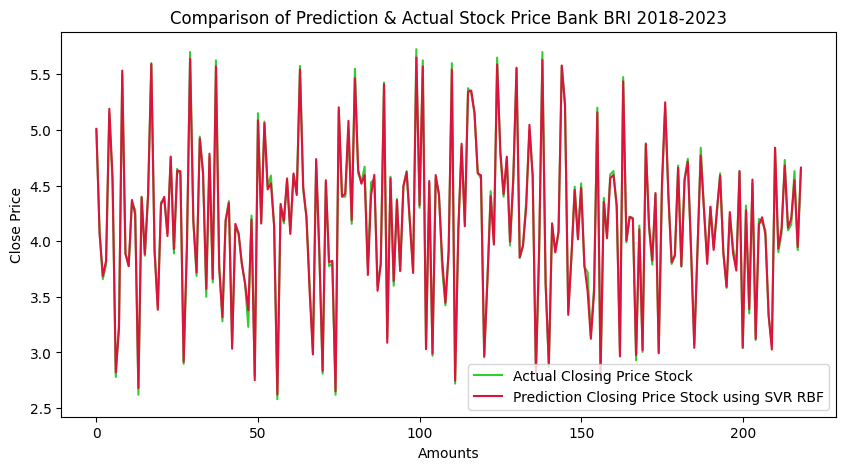

In [93]:
plt.figure(figsize=(10,5))
plt.plot(inversed_scaled_Y_test,label='Actual Closing Price Stock',color='limegreen')
plt.plot(inversed_scaled_prediksi,label='Prediction Closing Price Stock using SVR RBF',color='crimson')
plt.xlabel('Amounts')
plt.ylabel('Close Price')
plt.title('Comparison of Prediction & Actual Stock Price Bank BRI 2018-2023')
plt.legend()
plt.show()

##### Evaluasi Model

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math

mape = mean_absolute_percentage_error(inversed_scaled_Y_test,inversed_scaled_prediksi)
mse = mean_squared_error(inversed_scaled_Y_test,inversed_scaled_prediksi)
mae = mean_absolute_error(inversed_scaled_Y_test,inversed_scaled_prediksi)

print('Hasil MAPE : ',mape)
print('Hasil MSE : ',mse)
print('Hasil RMSE : ',math.sqrt(mse))
print('Hasil MAE : ',mae)

Hasil MAPE :  0.007321604600244569
Hasil MSE :  0.0014585857103907012
Hasil RMSE :  0.03819143503968791
Hasil MAE :  0.02958271668845855


In [84]:
from sklearn.metrics import r2_score

print('Hasil R2 Score : ',r2_score(inversed_scaled_Y_test,inversed_scaled_prediksi)*100)

Hasil R2 Score :  99.71846577274171
